# Homework 6: Mixed effects

This homework assignment is designed to give you practice fitting and interpreting mixed effects models. 

We will be using the **LexicalData.csv** and **Items.csv** files from the *Homework/lexDat* folder in the class GitHub repository again. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). Unlike in the previous homework, there isn't any missing data in the **LexicalData.csv** file. 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData.csv** and **Items.csv** files. As in the previous homeworks, remove the commas from the reaction times and convert them from strings to numbers. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to **LexicalData**. 

*Note: the `Freq_HAL` variable in **Items.csv** has a similar formatting issue, using string values with commas. We're not going to worry about fixing this since we're only using `Log_Freq_HAL`, which is the natural log transformation of `Freq_HAL`, in this homework.*

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(ISLR))

setwd("~/Documents/Elie_DSPN_S22")
items <-read.csv("Items.csv")
lexicaldata <-read.csv("LexicalData.csv")

#removing commas & converting strings
lexicaldata$D_RT <- as.numeric(gsub("[,]", "",lexicaldata$D_RT))

#adding word characteristics
lexicaldata <- left_join(lexicaldata,
                         items %>% select(Word,Length,Log_Freq_HAL),
                         by = c("D_Word"="Word"))

#checking 
head(lexicaldata)


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Length,Log_Freq_HAL
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
1,157,1,1,710,browse,false,-0.437,6,8.856
2,67,1,1,1094,refrigerant,false,0.825,11,4.644
3,120,1,1,587,gaining,false,-0.645,7,8.304
4,21,1,1,984,cheerless,false,0.025,9,2.639
5,236,1,1,577,pattered,false,-0.763,8,1.386
6,236,2,1,715,conjures,false,-0.364,8,5.268


---
## 2. Model fitting (4 points)

First, fit a linear model with `Log_Freq_HAL` and `Length` as predictors, and `D_RT` as the output. Include an interaction term. Use `summary()` to look at the model output. 

In [4]:
m1=lm(D_RT ~ Log_Freq_HAL + Length + Log_Freq_HAL*Length, lexicaldata)
summary(m1)


Call:
lm(formula = D_RT ~ Log_Freq_HAL + Length + Log_Freq_HAL * Length, 
    data = lexicaldata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1118.01  -205.23   -86.95    90.77  3147.07 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         610.1903    14.6678  41.601  < 2e-16 ***
Log_Freq_HAL         -6.0239     1.9678  -3.061  0.00221 ** 
Length               47.7531     1.6368  29.175  < 2e-16 ***
Log_Freq_HAL:Length  -2.9421     0.2348 -12.528  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 359.1 on 62606 degrees of freedom
Multiple R-squared:  0.09473,	Adjusted R-squared:  0.09469 
F-statistic:  2184 on 3 and 62606 DF,  p-value: < 2.2e-16


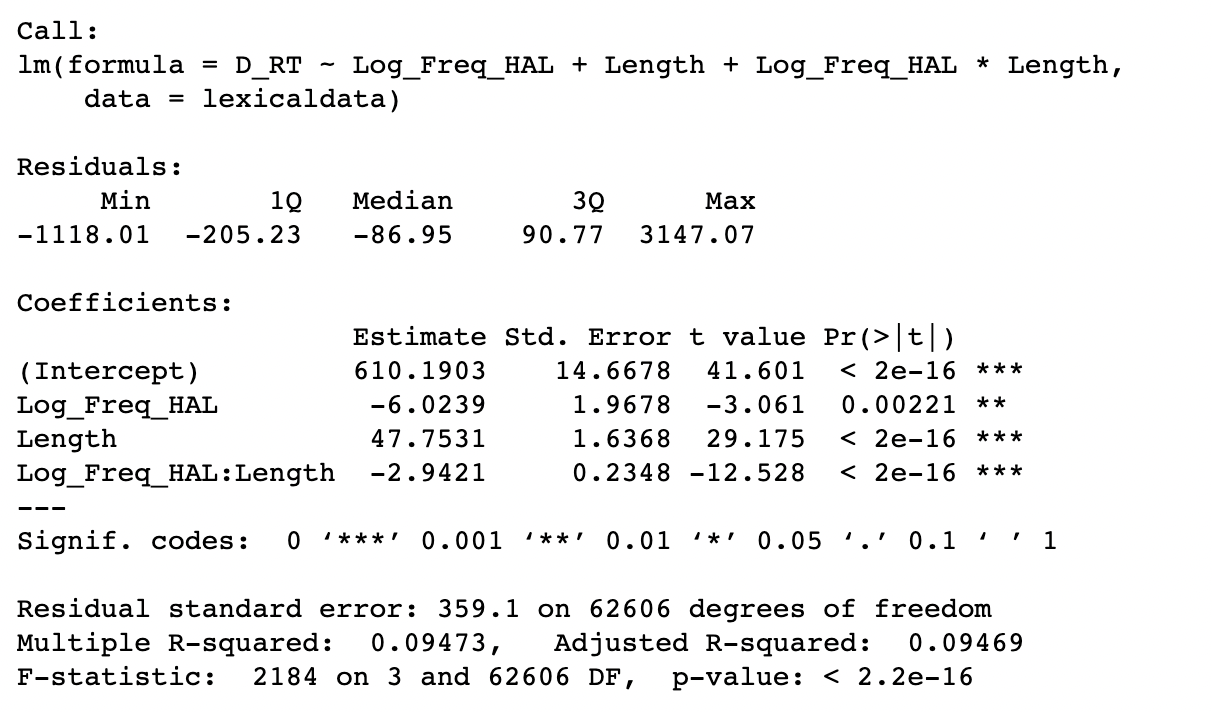

Now, install `lme4` using `install.packages()` and then load the library. 

In [4]:
suppressMessages(install.packages("lme4"))
suppressMessages(library(lme4))


The downloaded binary packages are in
	/var/folders/yn/sf7w4yq16t3dbzt44fwg3qs80000gq/T//Rtmp3goWlW/downloaded_packages


Now fit a mixed effects model that includes the same predictors as the linear model above, as well as random intercepts for `Sub_ID` (i.e., cases where subject ID shifts the RT mean). Use `summary()` to look at the model output. 

In [6]:
#subject intercepts
m1.me <- lmer(D_RT ~ Log_Freq_HAL + Length + Log_Freq_HAL*Length + (1 | Sub_ID), lexicaldata)
summary(m1.me)

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ Log_Freq_HAL + Length + Log_Freq_HAL * Length + (1 | Sub_ID)
   Data: lexicaldata

REML criterion at convergence: 888235.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5058 -0.5472 -0.1568  0.3103 10.7381 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sub_ID   (Intercept) 46333    215.3   
 Residual             82978    288.1   
Number of obs: 62610, groups:  Sub_ID, 299

Fixed effects:
                    Estimate Std. Error t value
(Intercept)         616.8445    17.1522  35.963
Log_Freq_HAL         -7.4374     1.5830  -4.698
Length               47.7477     1.3162  36.277
Log_Freq_HAL:Length  -2.8778     0.1888 -15.239

Correlation of Fixed Effects:
            (Intr) Lg_F_HAL Length
Log_Frq_HAL -0.645                
Length      -0.656  0.917         
Lg_Fr_HAL:L  0.582 -0.942   -0.923

---
## 3. Model assessment (4 points)

Compare the three t-values for the fixed effects and the mixed effects models. How do they differ, and why? 

> (taking the absolute values of the t-values) The t-value for frequency of HAL (frequency of a word) on reaction time increased to 4.698 (from 3.061 in the simple linear model); for Length, the t-value increased to 36.277 (from 29.175 in the linear model); and the interaction term increased to 15.239 (from 12.528 in the linear model). 
> Mixed effects models gave a less conservative model fit on the fixed effects. 
> We see this difference because our mixed effects models are accounting for the random effects of the subjects in this model. But we need to compare the mixed and the simple linear model to make an inferences about the random effects.

Use the Aikeke Information Criterion (AIC) to compare these two models. Which one is better? 

In [7]:
ic <- AIC(m1, m1.me)
ic
diff(ic$AIC)

,df,AIC
,<dbl>,<dbl>
m1,5,914436.4
m1.me,6,888247.6


[1] -26188.82

> Mixed effects model is a better model choice for the data; mixed effects model accounts for more variance in reaction time than simple linear model
> 

---
##  4. Reflection (1 point)

What other random effects could be controlled for in this data set? 

> Trial number
> 

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Danielle F., Avital P.*